In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [3]:
class NeuronLayer():
    def __init__(self,input_num,neuron_num,activ_funk= lambda x: x):
        self.W=np.random.randn(input_num,neuron_num)
        self._b = np.ones(neuron_num)
        self.activ_funk = activ_funk


    def forward(self, X):
        self.input_x = X
        return self.activ_funk(X @ self.W+self._b)


    def backward(self,output_err, learn_rate):     
        layer_err = (output_err * sigmoid(self.input_x @ self.W+self._b) * (1-sigmoid(self.input_x @ self.W+self._b))) @ self.W.T
        self.W = self.W + learn_rate * (self.input_x.T @ (output_err * sigmoid(self.input_x @ self.W+self._b) * sigmoid(1-self.input_x @ self.W+self._b)))
        self._b = self._b + learn_rate * (output_err  * sigmoid(self.input_x @ self.W+self._b) * sigmoid(1-self.input_x @ self.W+self._b))
        return layer_err

In [4]:
class NeuralNetwork():
    def __init__(self,random_state=None):
        if not random_state:
            self.random_state = np.random.randint(0,100000)
        else:
            self.random_state= random_state

        np.random.seed(self.random_state)
        
        self.input_layer = NeuronLayer(15,15,sigmoid)
        self.output_layer = NeuronLayer(15,4,sigmoid)
        
    def fit(self,X,Y,epoch_num=100,learn_rate=0.5):
        self.accuracy = []
        for _ in range(epoch_num):
            pred_Y = self.output_layer.forward(self.input_layer.forward(X))
            output_err = pred_Y*(1-pred_Y)*(Y-pred_Y)
            self.input_layer.backward(self.output_layer.backward(output_err,learn_rate),learn_rate)
            self.accuracy.append(accuracy_score(Y,np.round(pred_Y).astype(int)))

    def predict(self,X):
        return self.output_layer.forward(self.input_layer.forward(X))

In [13]:
X = np.array([
[1,1,1,1,0,1,1,0,1,1,0,1,1,1,1],
[0,1,0,1,1,0,0,1,0,0,1,0,1,1,1],
[1,1,1,0,0,1,0,1,0,1,0,0,1,1,1],
[1,1,1,0,0,1,0,1,1,0,0,1,1,1,1],
[1,0,1,1,0,1,1,1,1,0,0,1,0,0,1],
[1,1,1,1,0,0,1,1,1,0,0,1,1,1,1],
[1,1,1,1,0,0,1,1,1,1,0,1,1,1,1],
[1,1,1,0,0,1,0,1,0,0,1,0,0,1,0],
[1,1,1,1,0,1,1,1,1,1,0,1,1,1,1],
[1,1,1,1,0,1,1,1,1,0,0,1,1,1,1]
])
Y = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],
[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1]],dtype=int)

In [14]:
NN = NeuralNetwork()
NN.fit(X,Y,300)
np.round(NN.predict(X),0)

array([[0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 1.],
       [0., 1., 1., 0.],
       [0., 1., 1., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.]])

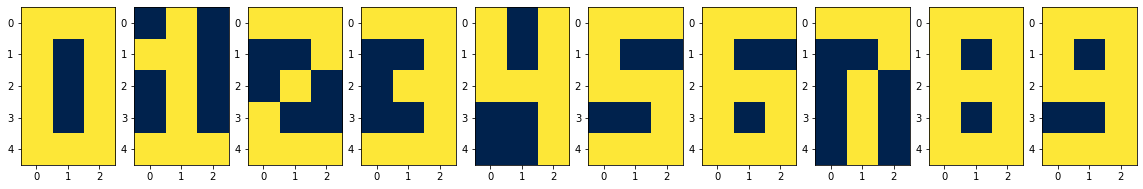

In [15]:
fig, axs = plt.subplots(1,10,figsize=(20,10))
res = np.round(NN.predict(X))
for num in range(len(res)):
    ls = res[num].astype(int).tolist()
    bn = ''.join(map(str,ls))
    if int(bn,2) < len(res):
        axs[num].imshow(X[int(bn,2)].reshape(-1,3),cmap='cividis')
    else:
        axs[num].imshow(np.ones(15).reshape(-1,3))

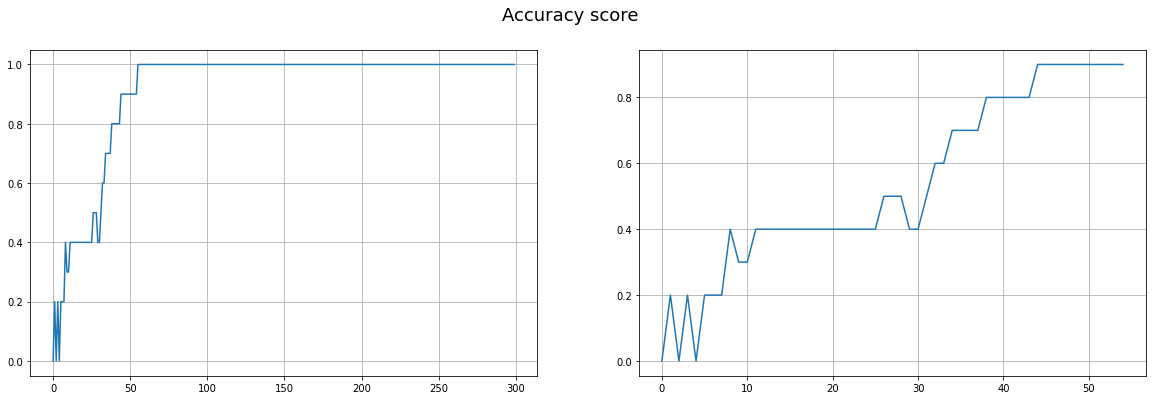

In [16]:
fig, axs = plt.subplots(1,2,figsize=(20,6))
fig.suptitle("Accuracy score",fontsize=18)
auc = np.array(NN.accuracy)
axs[0].plot(np.array([x for x in range(len(auc))]),np.array(auc))
axs[1].plot(np.array([x for x in range(len(auc[auc<1]))]),np.array(auc[auc<1]))
axs[0].grid()
axs[1].grid()
plt.show()